In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\bank.csv")

In [3]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes


In [4]:
data.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10858,40,management,married,tertiary,no,2147.0,yes,no,unknown,30.0,may,115.0,1,-1.0,0,unknown,no
10859,43,blue-collar,married,secondary,no,1096.0,no,yes,unknown,30.0,may,180.0,1,-1.0,0,unknown,no
10860,41,admin.,single,tertiary,no,1455.0,yes,no,unknown,30.0,may,87.0,1,-1.0,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [6]:
data.shape

(10861, 17)

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Check for duplicate rows

In [9]:
data.duplicated().sum()

0

### Check for null values

In [10]:
data.isna().sum()

age           0
job          15
marital       0
education     9
default       0
balance       6
housing       0
loan          3
contact      11
day           1
month         0
duration     20
campaign      0
pdays        19
previous      0
poutcome      0
y             0
dtype: int64

### Drop the unwanted columns

In [11]:
data.drop(columns=['education','marital','default','housing','contact', 'day', 'month','duration'],inplace=True)

In [12]:
data['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [13]:
data.head(3)

,age,job,balance,loan,campaign,pdays,previous,poutcome,y
0,59,admin.,2343.0,no,1,-1.0,0,unknown,yes
1,56,admin.,45.0,no,1,-1.0,0,unknown,yes
2,41,technician,1270.0,no,1,-1.0,0,unknown,yes


### Categorising data into numerical and categorical separately

In [14]:
num_data=data.select_dtypes(include="number")
num_data.head(2)

,age,balance,campaign,pdays,previous
0,59,2343.0,1,-1.0,0
1,56,45.0,1,-1.0,0


In [15]:
cat_data=data.select_dtypes(include="object_")
cat_data.head(3)

,job,loan,poutcome,y
0,admin.,no,unknown,yes
1,admin.,no,unknown,yes
2,technician,no,unknown,yes


### Separate histograms of each numerical columns

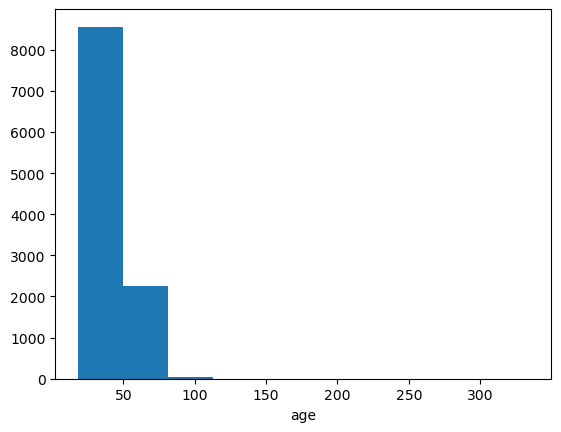

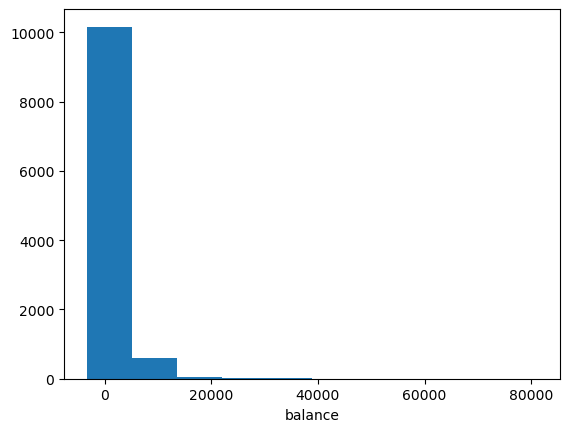

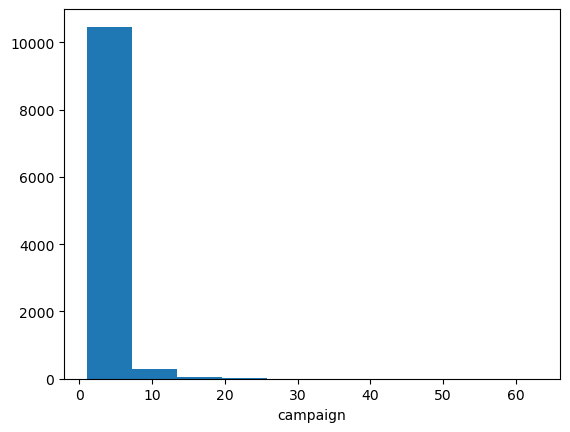

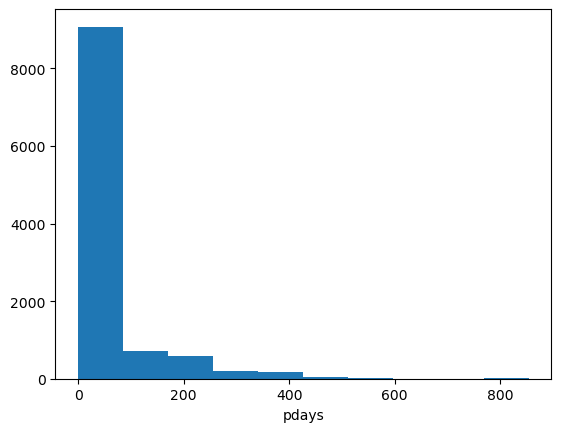

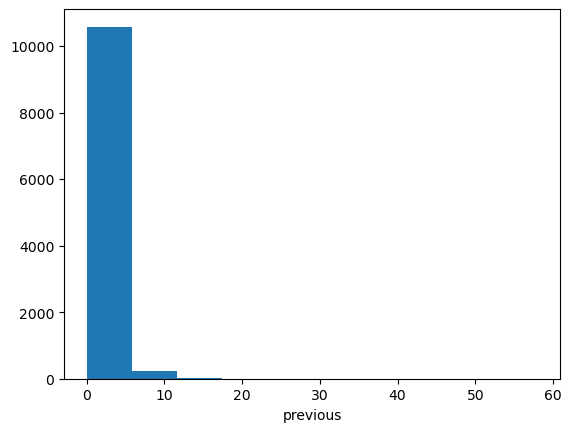

In [16]:
for col in num_data:
    plt.hist(num_data[col])
    plt.xlabel(col)
    plt.show()

### Filling null values in numerical columns using median()

In [17]:
for i in num_data:
    num_data[i]=num_data[i].fillna(num_data[i].median())

In [18]:
num_data.isna().sum()

age         0
balance     0
campaign    0
pdays       0
previous    0
dtype: int64

### Filling null values in categorical columns using mode()

In [19]:
for i in cat_data:
    cat_data[i]=cat_data[i].fillna(cat_data[i].mode()[0])

In [20]:
cat_data.isna().sum()

job         0
loan        0
poutcome    0
y           0
dtype: int64

### Boxplot 

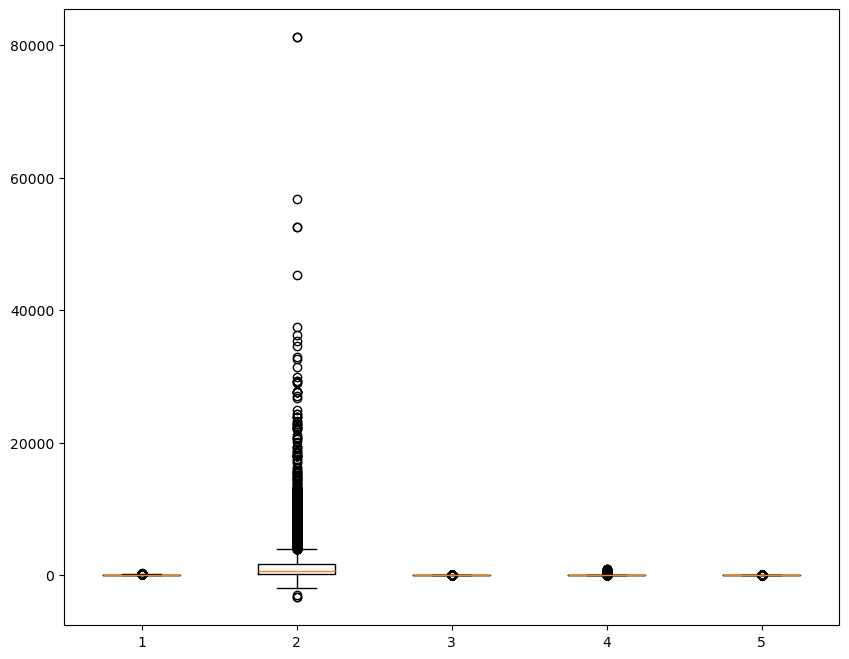

In [21]:
plt.figure(figsize=(10,8))
plt.boxplot(num_data)
plt.show()

### Outlier Removal

In [22]:
def replace_outlier_with_ub(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    data[column]=data[column].clip(upper=ub)
    data[column]=data[column].clip(lower=lb)
    return data[column]

In [23]:
for col in num_data:
  num_data[col]=replace_outlier_with_ub(num_data,col)

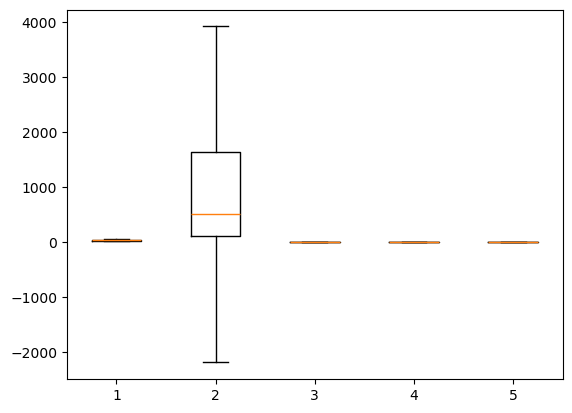

In [24]:
plt.boxplot(num_data)
plt.show()

 ### MinMaxScaling

In [25]:
#for col in num_data:              
    #num_data[col]=(num_data[col]-num_data[col].min())/(num_data[col].max()-num_data[col].min()) 

In [26]:
mms=MinMaxScaler()
scaler=mms.fit_transform(num_data)
data_scaled=pd.DataFrame(scaler,columns=num_data.columns)
data_scaled.head()

,age,balance,campaign,pdays,previous
0,0.796117,0.741317,0.0,0.0,0.0
1,0.737864,0.364843,0.0,0.0,0.0
2,0.446602,0.565531,0.0,0.0,0.0
3,0.718447,0.763106,0.0,0.0,0.0
4,0.699029,0.387615,0.2,0.0,0.0


### Label Encoding

In [28]:
for col in cat_data:           
    le=LabelEncoder()
    cat_data[col]=le.fit_transform(cat_data[col])

In [29]:
cat_data.head()

,job,loan,poutcome,y
0,0,0,3,1
1,0,0,3,1
2,9,0,3,1
3,7,0,3,1
4,0,0,3,1


In [30]:
cat_data['y'].value_counts()

y
0    5572
1    5289
Name: count, dtype: int64

 ### concatinating numerical and categorical data again as final_df

In [35]:
final_data= pd.concat([data_scaled, cat_data],axis=1)    
final_data.head(3)

,age,balance,campaign,pdays,previous,job,loan,poutcome,y
0,0.796117,0.741317,0.0,0.0,0.0,0,0,3,1
1,0.737864,0.364843,0.0,0.0,0.0,0,0,3,1
2,0.446602,0.565531,0.0,0.0,0.0,9,0,3,1


In [40]:
X=final_data.drop(columns=['y'])
y=final_data['y']

### Train Test Split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Selection and Training

### DecisionTreeClassifier

In [46]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
dtc_pred = dtc_model.predict(X_test)


dtc_accuracy = accuracy_score(y_test,dtc_pred)
print(f"Accuracy: {dtc_accuracy * 100} %")

Accuracy: 65.66958122411413 %


###  RandomForestClassifier

In [51]:
RF_model =  RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_pred = RF_model.predict(X_test)


RF_accuracy = accuracy_score(y_test,RF_pred)
print(f"Accuracy: {RF_accuracy * 100} %")

Accuracy: 69.12103083294984 %


### KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)


knn_accuracy = accuracy_score(y_test,knn_pred)
print(f"Accuracy: {knn_accuracy * 100} %")

Accuracy: 69.94937873907041 %


###  LogisticRegression

In [57]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
LR_pred = LR_model.predict(X_test)


LR_accuracy = accuracy_score(y_test,LR_pred)
print(f"Accuracy: {LR_accuracy * 100} %")

Accuracy: 71.05384261389783 %


### SVC

In [59]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)


svc_accuracy = accuracy_score(y_test,svc_pred)
print(f"Accuracy: {svc_accuracy * 100} %")

Accuracy: 72.02024850437184 %


In [63]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1119
           1       0.84      0.52      0.64      1054

    accuracy                           0.72      2173
   macro avg       0.76      0.71      0.71      2173
weighted avg       0.75      0.72      0.71      2173

